In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_arry = cv2.imread("train/angry/im0.png")

In [3]:
img_arry.shape

(48, 48, 3)

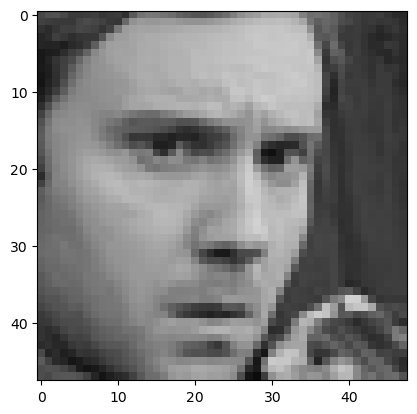

In [4]:
plt.imshow(img_arry)

In [5]:
Datadirectory ="train/"

In [6]:
Classes = ["angry","disgusted","fearful","happy","neutral","sad","surprised"]

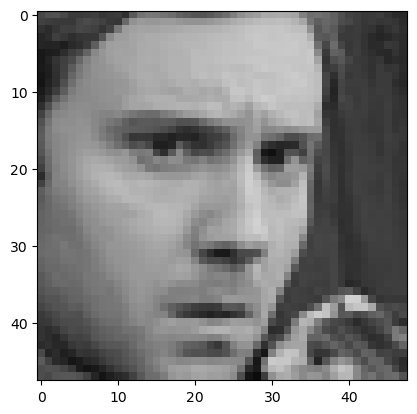

In [7]:
for category in Classes:
    path= os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_arry = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_arry, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

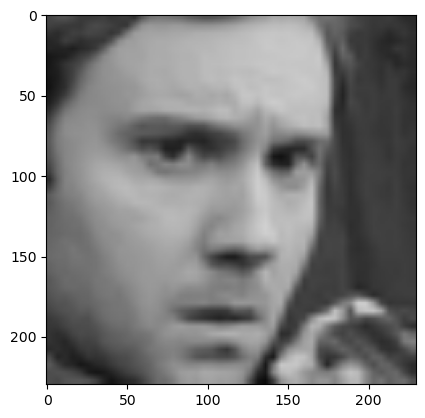

In [8]:
img_size=230
new_arry =cv2.resize(img_arry,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_arry,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_arry.shape

(230, 230, 3)

In [10]:
training_data=[]

def create_training_data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num= Classes.index(category)
        for img in os.listdir(path):
            try:
                img_arry=cv2.imread(os.path.join(path,img))
                new_arry=cv2.resize(img_arry,(img_size,img_size))
                training_data.append([new_arry,class_num])
            except Exception as e:
                pass

In [11]:
create_training_data()

In [12]:
print(len(training_data))

28709


In [14]:
temp=np.array(training_data)

C:\Users\CCB\AppData\Local\Temp\ipykernel_20200\2273940424.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp=np.array(training_data)


In [15]:
temp.shape

(28709, 2)

In [13]:
import random
random.shuffle(training_data)

In [16]:
X=[] ##feature/data
Y=[] ##label

for features,label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3)